# Task 1

creation of a few constants and arrays

In [3]:
import numpy as np
import matplotlib.pyplot as plt

starttime = 0;
endtime = 1;
R = 90*10**(6); #membrane resistance
E_l = -65*10**(-3); #membrane resting potential
tau_m = 30*10**(-3); #time constant
u_th = -50*10**(-3); #threshold potential 
refrac = 0 #5*10**(-3); #resting time inbetween spikes
u_reset = E_l; #reset potential after a spike

I1 = np.ones(10000)*10**(-12)
t = np.arange(starttime,endtime*10000)
spike = np.zeros(10000)
dt = (t[2]-t[1])/10000
for i in range(0,1000):
    I1[i] = 0
for i in range(9000,10000):
    I1[i] = 0
u = np.ones(10000)*E_l;



# a)

In [422]:
I1 = np.ones(10000)*500*10**(-12)
t = np.arange(0,1*10000)
spike = np.zeros(10000)

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I1[i] = 0
for i in range(9000,10000):
    I1[i] = 0
u = np.ones(10000)*E_l;

#making a sum for all the spikes during 1 second of elapsed time
for i in range(1,10000):
    dudt = (E_l - u[i] + R*I1[i])/tau_m
    u[i] = u[i-1] + dudt*dt
    if u[i] > u_th:
        u[i] = u_reset
        spike[i] = 1
sumSpike = sum(spike)/0.8

print(sumSpike)

98.75


As seen above if the input current is 500pA the spiking rate is equal to 98.75Hz.
Both of which compared to the lecture slides seems reasonable

# b)

In [424]:
I2 = np.ones(10000)*25*10**(-12) # since j in range(0,1200) would take ages i decided to use 
# 1200/25 = 48 different values for the inputcurrent (laptop)

spike = np.zeros(10000) 
dt = (t[2]-t[1])/10000

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I2[i] = 0
for i in range(9000,10000):
    I2[i] = 0

#resetting values for the previous cell
u = np.ones(10000)*E_l;
end = 48
sumSpike = np.zeros(end)
Icurrent = np.ones(end)


for j in range(0,end):
    for i in range(1,10000):
        dudt = (E_l - u[i] + R*I2[i]*j)/tau_m
        u[i] = u[i-1] + dudt*dt
        if u[i] > u_th:
            u[i] = u_reset
            spike[i] = 1
    sumSpike[j] = sum(spike)/0.8   
    Icurrent[j] = I2[5000]*j
    #resetting values for the next loop
    u = np.ones(10000)*E_l;
    spike = np.zeros(10000) 

In [425]:
#zeroing values outside of the [10 200]Hz intervall
end = 48 
for k in range(0,end):
    if sumSpike[k] < 10:
        sumSpike[k] = 0
    if sumSpike[k] > 200:
        sumSpike[k] = 0
print(sumSpike)

[  0.     0.    10.    13.75  20.    25.    28.75  33.75  38.75  43.75
  48.75  53.75  58.75  63.75  68.75  73.75  80.    83.75  88.75  93.75
  98.75 103.75 108.75 113.75 118.75 122.5  128.75 132.5  138.75 143.75
 148.75 153.75 157.5  163.75 168.75 171.25 177.5  181.25 187.5  191.25
 200.     0.     0.     0.     0.     0.     0.     0.  ]


Text(0, 0.5, 'Spiking rate [10 200]Hz')

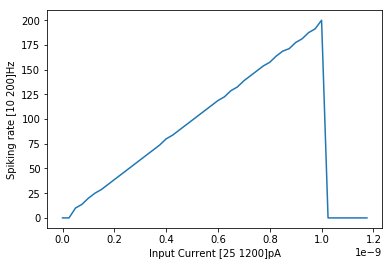

In [426]:
plt.plot(Icurrent,sumSpike)
plt.xlabel('Input Current [25 1200]pA')
plt.ylabel('Spiking rate [10 200]Hz')


In [427]:
%%latex 
No they are ot similar since the Fig. 2.11 in [2] got a refractory period $\neq$ 0, which is what we got here

<IPython.core.display.Latex object>

# c) 

In [428]:
%%latex 
$\large T = tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}} , \quad I_0 = 600pA , \delta_{th} = abs(E_l - v_{th})$


<IPython.core.display.Latex object>

In [429]:
T = tau_m * np.log((R*I2[5000]*24)/(R*I2[5000]*24-(u_th-E_l)))                
print('T = ',T)
print('T^(-1) = Hz_T =', 1/T)

T =  0.009762672013038837
T^(-1) = Hz_T = 102.43097367856046


In [430]:
%%latex 
The derived value of $Hz_T$ with the constant input current of 600pA is $ = 102 Hz$.
Which seems like a resonable value if you compare it to the graph above 


<IPython.core.display.Latex object>

In [431]:
%%latex
$\nu = \frac{1}{\Delta + T} = \frac{1}{\Delta^{abs} + tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}}} = \frac{1}{T_{\Delta}}$

<IPython.core.display.Latex object>

In [432]:
%%latex
Here we add a refractory period, a period that in the biological sense describes the "recovery" 
period for a neuron spike, to simulate an more accurate model for a spiking neuron.
Wich explains the eq. 4.9 [2]

<IPython.core.display.Latex object>

# d)


In [433]:
I3 = np.ones(10000)*6*10**(-12) # since j in range(0,1200) would take ages i decided to use 
# 1200/6 = 200 different values for the inputcurrent (laptop)

refrac = 5*10**(-3)*10000 #resting time inbetween spikes
spike = np.zeros(10000) 
dt = (t[2]-t[1])/10000

#making the constant current for the time intervall 0.1 to 0.9
for i in range(0,1000):
    I3[i] = 0
for i in range(9000,10000):
    I3[i] = 0

#resetting values for the previous cell
u = np.ones(10000)*E_l;
end = 200
sumSpike1 = np.zeros(end)
Icurrent1 = np.ones(end)
z = 0


for j in range(0,end):
    for i in range(1,10000):
        if z == 0:
            dudt = (E_l - u[i] + R*I3[i]*j)/tau_m
            u[i] = u[i-1] + dudt*dt
            if u[i] > u_th:
                u[i] = u_reset
                spike[i] = 1
                z = refrac # if the threshold for the spike is triggerd there is a recovery period for the "neuron", here that
                # preiod is refrac = 50ms
        elif z > 0:
            z = z - 1
    sumSpike1[j] = sum(spike)/0.8
    Icurrent1[j] = I3[5000]*j
    #resetting values for the next loop
    u = np.ones(10000)*E_l;
    I = np.ones(10000)*6*10**(-12)
    for i in range(0,1000):
        I3[i] = 0
    for i in range(9000,10000):
        I3[i] = 0
    spike = np.zeros(10000)

In [434]:
#zeroing values outside of the [10 200]Hz intervall
for k in range(0,end):
    if sumSpike1[k] < 10:
        sumSpike1[k] = 0
    if sumSpike1[k] > 200:
        sumSpike1[k] = 0
print(sumSpike1)
refrac

[  0.     0.     0.     0.     0.     0.     0.     0.     0.    10.
  11.25  11.25  12.5   13.75  15.    16.25  17.5   17.5   18.75  20.
  21.25  22.5   22.5   23.75  25.    25.    26.25  27.5   28.75  28.75
  30.    31.25  31.25  32.5   33.75  33.75  35.    36.25  36.25  37.5
  38.75  38.75  40.    40.    41.25  42.5   42.5   43.75  43.75  45.
  46.25  46.25  47.5   47.5   48.75  48.75  50.    50.    51.25  51.25
  52.5   53.75  53.75  53.75  55.    55.    56.25  57.5   57.5   58.75
  58.75  58.75  60.    60.    61.25  61.25  62.5   62.5   63.75  63.75
  63.75  65.    65.    66.25  66.25  67.5   67.5   68.75  68.75  68.75
  70.    70.    71.25  71.25  71.25  72.5   72.5   73.75  73.75  73.75
  75.    75.    75.    76.25  76.25  76.25  77.5   77.5   77.5   78.75
  78.75  78.75  80.    80.    80.    81.25  81.25  81.25  82.5   82.5
  83.75  83.75  83.75  85.    85.    85.    85.    86.25  86.25  87.5
  87.5   87.5   87.5   88.75  88.75  88.75  88.75  90.    90.    91.25
  91.25  91.25 

50.0

Text(0, 0.5, 'Spiking rate [10 200]Hz')

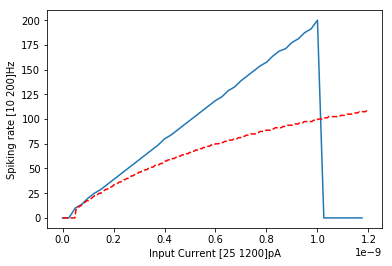

In [435]:
plt.plot(Icurrent,sumSpike)
plt.plot(Icurrent1,sumSpike1,'--r')
plt.xlabel('Input Current [25 1200]pA')
plt.ylabel('Spiking rate [10 200]Hz')


In [436]:
%%latex
Here we again have the frequency
$\nu = \frac{1}{\Delta + T} = \frac{1}{\Delta^{abs} + tau_m * ln\frac{R*I_0}{R*I_0-\delta_{th}}} = \frac{1}{T_{\Delta}}\quad $
where $\Delta^{abs}$ = 5ms, $\delta_{th} = abs(E_l - v_{th})$ then we calculate $\nu$ to;

<IPython.core.display.Latex object>

In [437]:
T_D = 5*10**(-3) + tau_m * np.log((R*I3[5000]*100)/(R*I3[5000]*100-(u_th-E_l)))
print('v = 1/T_D =',1/T_D, 'Hz')

v = 1/T_D = 67.73841477455909 Hz


In [438]:
%%latex
If we compare the red-dotted line on the polt for the value $I_0 = 600 pA$ 
we observe that $\nu$ and the plot is reasonably close

<IPython.core.display.Latex object>

# e)

The refractory period in a neuron is the biologically bi-effect of a spike. During the spike the neuron cell creates a imbalance of the potassium and sodium levels within and outside the cellmembrane. The refractory period is the rebalancing of these, and a few more, elements. 

# f)

Three of many limitations that is mentioned in the Neural dymaics is that the leaky integrate-and-fire model
"simplified", "neglects many aspects of neuro dynamics" and for this task specificly the current is "integrated linearly independently of the state of the postsynaptic neuron". 

# Task 2

# a)

In [66]:
count = 500
thy = np.zeros(count)
recliny = np.zeros(count)
sigmoidy = np.zeros(count)
tanhy = np.zeros(count)

#defining the functions
def th (x):
    if x < 0:
        th1 = 0 
    else:
        th1 = 1
    return th1;
def reclin (x):
    if x < 0:
        reclin1 = 0 
    else:
        reclin1 = x
    return reclin1;
def sigmoid (x):
    sigmoid1 = 1/(1 + np.exp(-1*x))
    return sigmoid1;
def tanh (x):
    tanh1 = (2/(1 + np.exp(-2*x))) - 1
    return tanh1;

x = np.linspace(-2,2,count)
func = [th, reclin, sigmoid, tanh]
y = [thy, recliny, sigmoidy, tanhy]

#calculationg the function values for the input arguments in x
for j in range(0,4):       
    for i in range(0,count):
        y[j][i] = func[j](x[i])

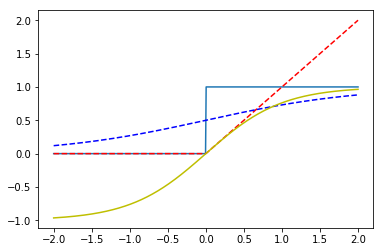

In [67]:
#plotting the functions
plt.plot(x,y[0])
plt.plot(x,y[1],'--r')
plt.plot(x,y[2],'--b')
plt.plot(x,y[3],'y')

# b)